<a href="https://colab.research.google.com/github/bluewink/dataQualityClassifier/blob/master/naive_bayes_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#!tar -xvf enron1.tar.gz

In [34]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

emails, labels = [], []

paths= ['enron1/spam/', 'enron1/ham/']
#glob를 이용해 각각의 파일을 읽어, 읽어온 것을 email에 집어 넣는다.
for path in paths:
  for filename in glob.glob(os.path.join(path, '*.txt')):
    with open(filename, 'r', encoding= 'ISO-8859-1') as file:
      emails.append(file.read())
      if path.endswith("spam/"): #path가 spam/로 끝나면
        labels.append(1)        #spam을 의미하는 1을 저장.
      else:
        labels.append(0)     #ham은 0을 저장
print(np.unique(labels, return_counts=True))
#빈도표를 만들어 준다.
#ham file, spam file 개수 확인

(array([0, 1]), array([3672, 1500]))


In [35]:
#숫자, 구두점, 사람 이름 제거 (불용어 제거)
#nltk natural language tool kit
import nltk
nltk.download('names')
#이름과 관련된 정보
nltk.download('wordnet')
#wordnet : 영어 단어 목록. 자연어 처리에 특화

#corpus : 말뭉치.
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
#lemmatizer : 단어 분류기

all_names = set(names.words())
#names에 있는 단어를 all_names에 저장.
lemmatizer = WordNetLemmatizer()
#lenmatizer : 워드넷에 있는 분류기

cleaned_emails =[]

#클리닝 작업
#소문자로 바꿔서 스플릿 한 이후 문자이고, all_names
#email에 한 문서가 있고 거기에 단어가 쭉 들어간다.
for email in emails:
    cleaned_emails.append(' '.join([lemmatizer.lemmatize(word.lower())
                                        for word in email.split()
                                        if word.isalpha()
                                        and word not in all_names]))

#list compression. : 1. email에서 split(), 이를 word라는 변수에 저장.
# word가 문자이면서, word가 all_names에 없는 단어(사람 이름 제거)들을 
# lower case로 바꿔서 lemmatizer 함수에 적용.
# 적용한 결과를 cleaned_email에 집어 넣는다.

print(cleaned_emails[0])
#소문자로 바뀌어 단어(특히 어근)만 남은 것을 확인할 수 있음.


[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
re final notice v hi again i sent you an email last week and need to confirm everything now please read info below and let me know if you have any question we are accepting your mo rtgage application if you have poor cr edit it is ok you can get a loa n for month payment appr oval process will take minute just visit the link below and fill short form http gffefv net azwml sincerely manager geoffrey winston heritage financing


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

#count vectorizer : 단어 출현 빈도와 관련돼 있는 작업을 수행해주는 특징 변환기
vectorizer = CountVectorizer(stop_words="english", max_features=500)
#vectorizer를 인스턴스로 만들기.
'''
CountVectorizer:
문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만든다.

CountVectorizer는 다음과 같은 세가지 작업을 수행한다.
1. 문서를 토큰 리스트로 변환한다.
2. 각 문서에서 토큰의 출현 빈도를 센다.
3. 각 문서를 BOW 인코딩 벡터로 변환한다.

BOW 방법에서는 전체 문서  {d1,d2,…,dn}  를 구성하는 고정된 단어장(vocabulary)  {t1,t2,…,tm}  를 만들고 
 di 라는 개별 문서에 단어장에 해당하는 단어들이 포함되어 있는지를 표시하는 방법이다.
x(i,j) =
문서 di내의 단어 tj의 출현 빈도
또는
x(i,j)={0 :만약 단어 tj가 문서 di 안에 없으면
        1 : 만약 단어 tj가 문서 di 안에 있으면}


'''
'''
변환만을 생각한다면 fit() , transform()을 함께 사용하지 않고 transform()만 사용하면 될텐데 
두개 메소드를 함께 사용하는 이유가 아래와 같이 있을 거라 추정됩니다(이 중 두번째 이유가 중요합니다. )

1. 사이킷런의 지도학습의 주요 메소드인 fit()과 predict()와 비슷한 API로 사용자들의 보다 쉬운 이해를 돕기 위해서.

2. 학습데이터 세트에서 변환을 위한 기반 설정(예를 들어 학습 데이터 세트의 최대값/최소값등)을 먼저 fit()을 통해서 설정한 뒤에
 이를 기반으로 학습 데이터의 transform()을 수행하되 학습 데이터에서 설정된 변환을 위한 기반 설정을 그대로 테스트 데이터에도 적용하기 위해서입니다.

즉 학습 데이터 세트로 fit() 된 Scaler를 이용하여 테스트 데이터를 변환할 경우에는  테스트 데이터에서 
다시 fit()하지 않고 반드시 그대로 이 Scaler를 이용하여 transform()을 수행해야 합니다.
'''

term_docs = vectorizer.fit_transform(cleaned_emails)
#vectorizer로 fit transform
#print(term_docs)
#term_docs : sparse matrix로 구성. 행, 열로 된 위치 정보.
# get feature names라는 vectorize의 메소드를 이용하면 텍스트 복원 가능

feature_names = vectorizer.get_feature_names()
#feature_names
#우리가 사용하는 column의 이름들.

In [37]:
#훈련 데이터와 테스트 데이터의 분리 및 변환

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cleaned_emails, labels, test_size = 0.3, random_state=35)
#30%로 테스트, 70%로 훈련.

#cleaned_email : 특징 벡터 (x) , labels: y ==> ham 인지 spam인지. 정답.

#훈련용 -> fit_transform
term_docs_train = vectorizer.fit_transform(x_train)
#테스트용 -> transform
term_docs_test = vectorizer.transform(x_test)
#학습 이전에 벡터로 변환. vectorizer를 이용해 encoding
#test 용 데이터는 적합화(fit) 필요 없이 transform만 적용.

In [38]:

#모델의 성능 측정 : 정확도, AUC
#MultinomialNB : 다항 분포 나이브베이즈 모델
#Naive Bayes classifier for multinomial models
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB(alpha=1, fit_prior=True)
#인스턴스 생성 
naive_bayes.fit(term_docs_train, y_train)
#피팅하기

# .predict(X)
# : Perform classification on an array of test vectors X.
y_pred = naive_bayes.predict(term_docs_test)
print(y_pred)
#Returns
#Predicted target values for X
#score : Return the mean accuracy on the given test data and labels.
naive_bayes.score(term_docs_test, y_test)

[0 0 0 ... 0 0 1]


0.9143041237113402

In [39]:
y_pred_proba = naive_bayes.predict_proba(term_docs_test)
#확률 담기

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

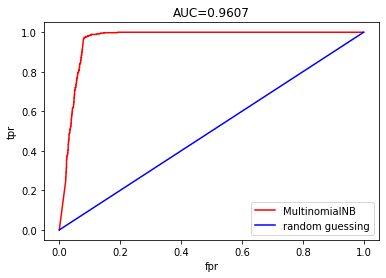

In [41]:
'''
AUC
: It tells how much model is capable of distinguishing between classes.
 Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 
'''


fpr, tpr , _ = roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, "r-", label="MultinomialNB")
plt.plot([0,1], [0,1], "b-", label="random guessing")
plt.title("AUC={:.4f}".format(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()

In [42]:
#최적의 예측기 만들기
from sklearn.model_selection import GridSearchCV

In [43]:
parameters = {
    "alpha": [0.5,1.0,1.5,2.0],
    "fit_prior": [True,False]
}

In [44]:
grid_search = GridSearchCV(naive_bayes, parameters, n_jobs=-1,cv=10, scoring= "roc_auc")

In [45]:
grid_search.fit(term_docs_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1, class_prior=None, fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.5, 1.0, 1.5, 2.0],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [46]:
grid_search.best_params_

{'alpha': 0.5, 'fit_prior': True}

In [47]:
naive_bayes_best = grid_search.best_estimator_

In [48]:
y_pred_proba = naive_bayes_best.predict_proba(term_docs_test)
y_pred_proba
#튜닝하고나서 사용하려면 y_pred_proba가 갱신되어야 함.

array([[1.00000000e+00, 2.83111660e-24],
       [9.99999968e-01, 3.22371705e-08],
       [1.00000000e+00, 1.17905937e-41],
       ...,
       [1.00000000e+00, 4.30217251e-16],
       [1.00000000e+00, 1.17905937e-41],
       [3.03093084e-04, 9.99696907e-01]])

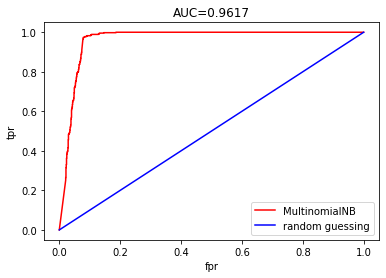

In [49]:
fpr, tpr , _ = roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, "r-", label="MultinomialNB")
plt.plot([0,1], [0,1], "b-", label="random guessing")
plt.title("AUC={:.4f}".format(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()